<a href="https://colab.research.google.com/github/enockmwizerwa123/Alanysis-of-Diabates-using-Linear-Regression/blob/main/Rt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install epyestim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%matplotlib inline

from scipy.stats import gamma, poisson

import epyestim
import epyestim.covid19 as covid19

In [ ]:
ch_cases = pd.read_csv(
    os.path.join('..', 'data', '/content/Data13.csv'),
    parse_dates=['Date']
).set_index('Date')['Log_TB_Case']

ch_cases

Date
1990-01-01    4.279
1990-01-02    4.255
1990-01-03    4.230
1990-01-04    4.204
1990-01-05    4.176
              ...  
1990-04-20    5.380
1990-04-21    5.393
1990-04-22    5.405
1990-04-23    5.418
1990-04-24    5.431
Name: Log_TB_Case, Length: 114, dtype: float64

In [ ]:
si_distrb = covid19.generate_standard_si_distribution()
delay_distrb = covid19.generate_standard_infection_to_reporting_distribution()

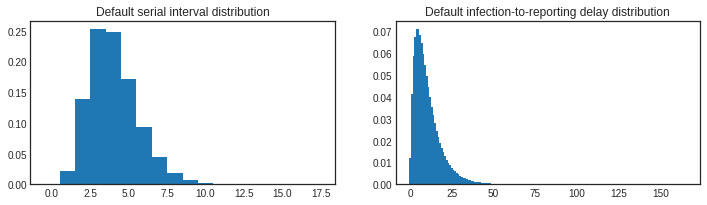

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))

axs[0].bar(range(len(si_distrb)), si_distrb, width=1)
axs[1].bar(range(len(delay_distrb)), delay_distrb, width=1)

axs[0].set_title('Default serial interval distribution')
axs[1].set_title('Default infection-to-reporting delay distribution')
plt.show()

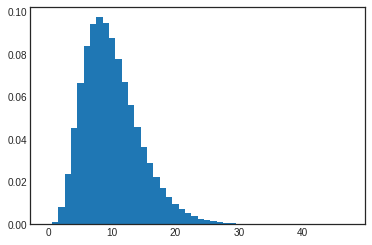

In [ ]:
my_continuous_distrb = gamma(a=5, scale=2)
my_discrete_distrb = epyestim.discrete_distrb(my_continuous_distrb)

plt.bar(range(len(my_discrete_distrb)), my_discrete_distrb, width=1)
plt.show()

In [ ]:
ch_time_varying_r = covid19.r_covid(ch_cases)

ch_time_varying_r.tail()

,cases,R_mean,R_var,Q0.025,Q0.5,Q0.975
1990-04-10,5.0,1.122459,0.070711,0.665437,1.103027,1.696944
1990-04-11,5.0,1.126086,0.071794,0.667466,1.106502,1.696108
1990-04-12,5.0,1.122784,0.071304,0.667514,1.099467,1.706728
1990-04-13,5.0,1.128821,0.070410,0.665494,1.106984,1.711171
1990-04-14,5.0,1.143374,0.070655,0.666634,1.122597,1.710264


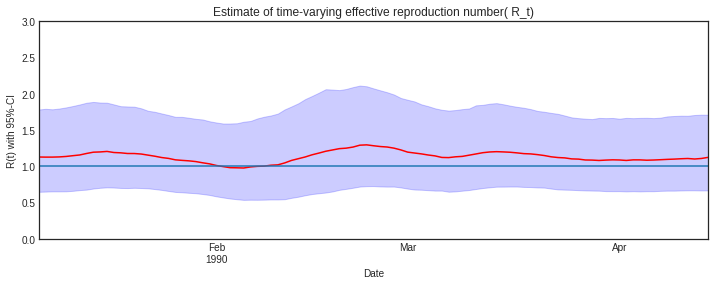

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))

ch_time_varying_r.loc[:,'Q0.5'].plot(ax=ax, color='red')
ax.fill_between(ch_time_varying_r.index, 
                    ch_time_varying_r['Q0.025'], 
                    ch_time_varying_r['Q0.975'], 
                    color='blue', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('R(t) with 95%-CI')
ax.set_ylim([0,3])
ax.axhline(y=1)
ax.set_title('Estimate of time-varying effective reproduction number( R_t)')
plt.show()